In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
import sys
import os
import random
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten
from keras import Input
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras import layers

In [24]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [25]:
print('X_train shape::: ',X_train.shape)
print('X_test shape::: ',X_test.shape)
print('y_train shape::: ',y_train.shape)
print('y_test shape::: ',y_test.shape)

X_train shape:::  (60000, 28, 28)
X_test shape:::  (10000, 28, 28)
y_train shape:::  (60000,)
y_test shape:::  (10000,)


In [26]:
X_train = X_train[:10000]
X_test = X_test[:1500]

In [27]:
y_train = y_train[:10000]
y_test = y_test[:1500]

In [28]:
y_test2 = y_test

In [29]:
def disp_img(X,y):
    labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']
    fig,ax = plt.subplots(5,5,sharey=False, tight_layout=True, figsize=(17,17), facecolor='white')
    n=0
    for i in range(0,5):
        for j in range(0,5):
            ax[i,j].matshow(X[n+100])
            index = int(y[n+100])
            ax[i,j].set_title(labels[index],fontsize=8)
            n=n+1
            plt.axis('off')
    plt.show()

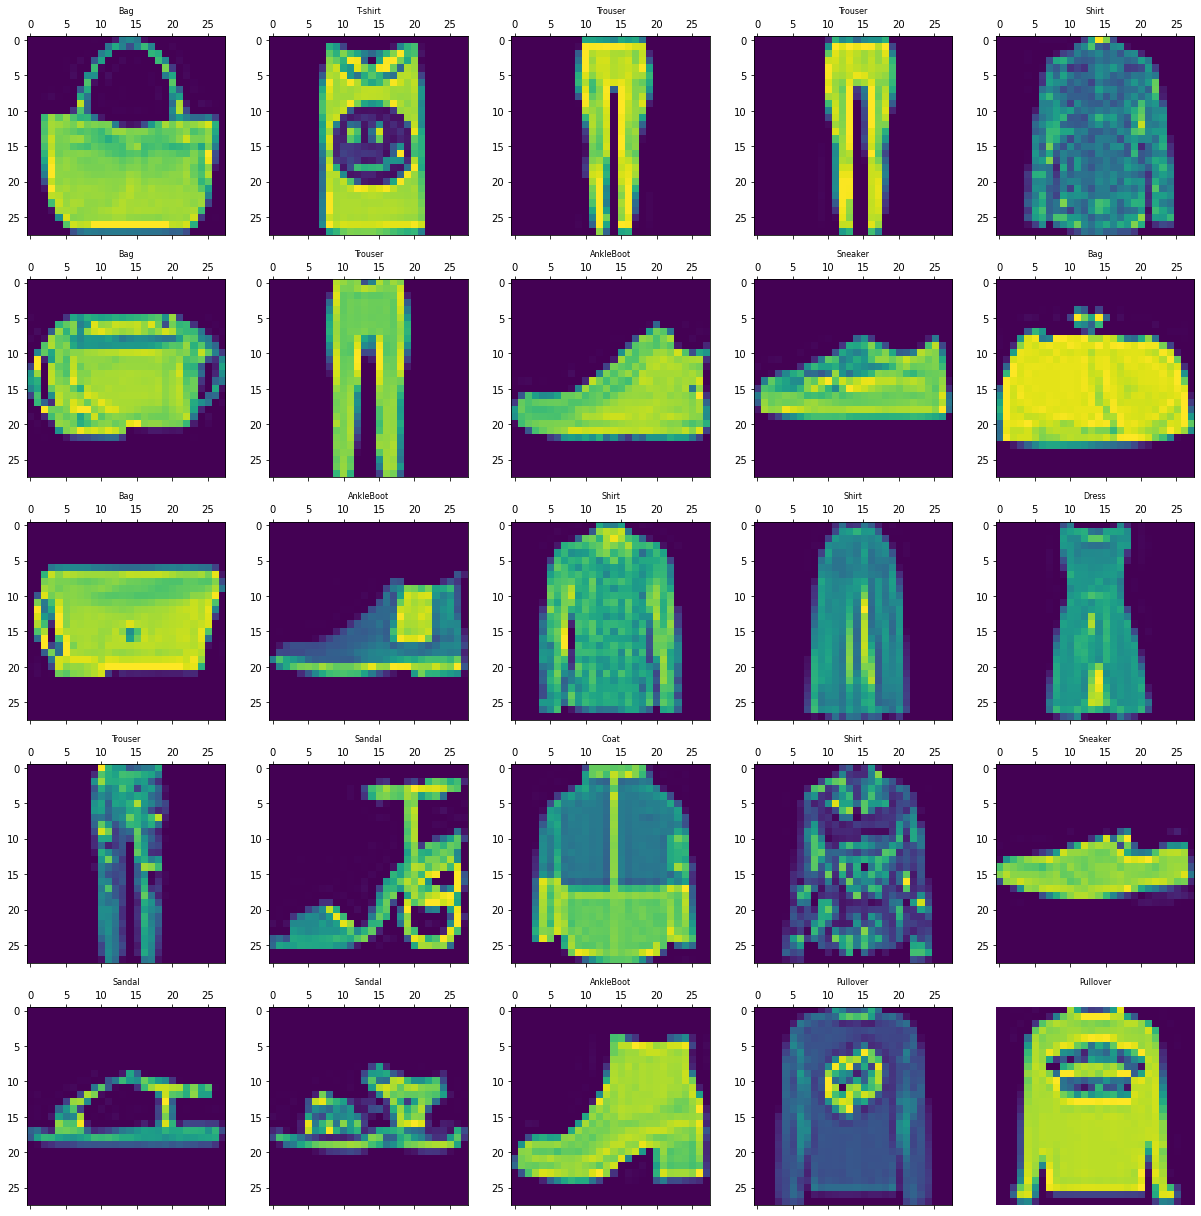

In [30]:
disp_img(X_train,y_train)

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
y_train.shape

(10000, 10)

In [59]:
def plot_acc(model_run,eps):
    plt.figure(figsize=(15,8))
    epochs = range(1,eps+1)
    train_accuracy = model_run.history['accuracy']
    val_accuracy = model_run.history['val_accuracy']
    sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
    plt.title('Accuracy v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy') 
    
def plot_loss(model_run,eps):
    plt.figure(figsize=(15,8))
    epochs = range(1,eps+1)
    train_loss = model_run.history['loss']
    val_loss = model_run.history['val_loss']
    sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
    sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
    plt.title('Loss v/s Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

def evaluation(model):
    loss,accuracy = model.evaluate(X_test,y_test)
    print('loss = ',np.round(loss,5))
    print('accuracy = ',np.round(accuracy*100,2))
    
    y_pred = np.argmax(model.predict(X_test),axis=1)
    print(classification_report(y_test2,y_pred))

def predict_image(y_pred,model,index):
      
    plt.matshow(X_test[index])
    y_ind = int(y_test2[index])
    labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']
    plt.title(labels[y_ind])
    
    y_ind2 = int(y_pred[index])
    print('predicted item name ::: ',labels[y_ind2])

# AlexNet

In [34]:
X_train.shape

(10000, 28, 28)

In [35]:
X_train = tf.expand_dims(X_train,3)
X_test = tf.expand_dims(X_test,3)

In [36]:
X_train.shape

TensorShape([10000, 28, 28, 1])

In [37]:
img_size = 224
reshape_scale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_size,img_size,input_shape=[28,28,1]),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

In [40]:
img = X_train[128]
img2 = reshape_scale(img)

In [41]:
img2.shape

TensorShape([28, 224, 224, 1])

In [45]:
img2[0]

<tf.Tensor: shape=(224, 224, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

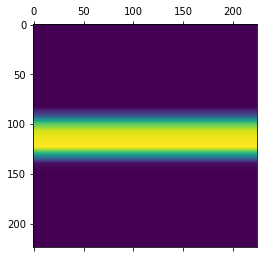

In [46]:
plt.matshow(img2[0])

In [47]:
X_train.shape

TensorShape([10000, 28, 28, 1])

In [48]:
def Alexnet():
    
    model = tf.keras.models.Sequential([
        reshape_scale,
        tf.keras.layers.Conv2D(filters=96,kernel_size=11,strides=4,activation='relu',padding='same',input_shape=(224,224,1)),
        tf.keras.layers.MaxPool2D(pool_size=3,strides=2),
        tf.keras.layers.Conv2D(filters=256,kernel_size=5,padding='same',activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3,strides=2),
        tf.keras.layers.Conv2D(filters=384,kernel_size=3,padding='valid',activation='relu'),
        tf.keras.layers.Conv2D(filters=384,kernel_size=3,padding='valid',activation='relu'),
        tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='valid',activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3,strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10,activation='softmax')])

    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [50]:
eps = 10
model_alexnet = Alexnet()
history_alexnet = model_alexnet.fit(X_train,y_train,epochs=eps,validation_split=0.2,validation_data=(X_test,y_test))

Epoch 1/10
250/250 [==============================] - 474s 2s/step - loss: 1.0768 - accuracy: 0.5891 - val_loss: 0.6245 - val_accuracy: 0.7710
Epoch 2/10
250/250 [==============================] - 450s 2s/step - loss: 0.5785 - accuracy: 0.7855 - val_loss: 0.5840 - val_accuracy: 0.7710
Epoch 3/10
250/250 [==============================] - 432s 2s/step - loss: 0.4787 - accuracy: 0.8229 - val_loss: 0.5190 - val_accuracy: 0.8150
Epoch 4/10
250/250 [==============================] - 443s 2s/step - loss: 0.4353 - accuracy: 0.8360 - val_loss: 0.5152 - val_accuracy: 0.8100
Epoch 5/10
250/250 [==============================] - 468s 2s/step - loss: 0.4080 - accuracy: 0.8474 - val_loss: 0.4468 - val_accuracy: 0.8320
Epoch 6/10
250/250 [==============================] - 435s 2s/step - loss: 0.3659 - accuracy: 0.8609 - val_loss: 0.4266 - val_accuracy: 0.8395
Epoch 7/10
250/250 [==============================] - 438s 2s/step - loss: 0.3617 - accuracy: 0.8646 - val_loss: 0.4322 - val_accuracy: 0.8300

In [51]:
model_alexnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 1)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        11712     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 384)      

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


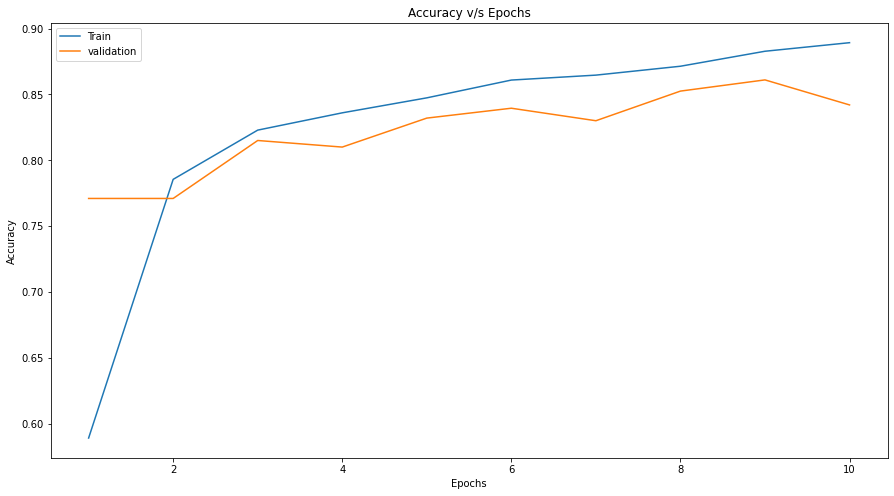

In [52]:
plot_acc(history_alexnet,eps)

C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sambitml\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


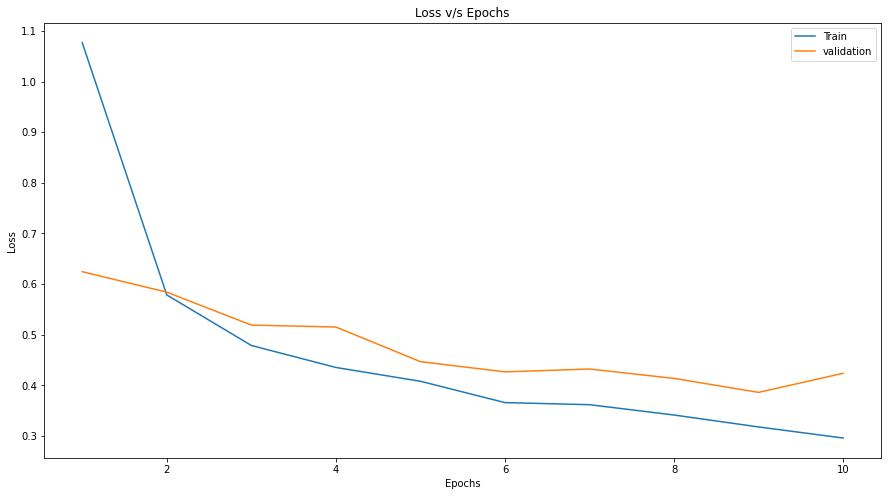

In [53]:
plot_loss(history_alexnet,eps)

In [54]:
evaluation(model_alexnet)

47/47 [==============================] - 19s 400ms/step - loss: 0.4288 - accuracy: 0.8507
loss =  0.4288
accuracy =  85.07
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       153
           1       0.99      0.92      0.96       150
           2       0.73      0.84      0.78       165
           3       0.83      0.88      0.86       137
           4       0.79      0.76      0.77       179
           5       0.97      0.97      0.97       146
           6       0.68      0.43      0.53       150
           7       0.96      0.91      0.94       143
           8       0.98      0.94      0.96       140
           9       0.92      0.98      0.95       137

    accuracy                           0.85      1500
   macro avg       0.86      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



In [61]:
y_pred = np.argmax(model_alexnet.predict(X_test),axis=1)

predicted item name :::  Sandal


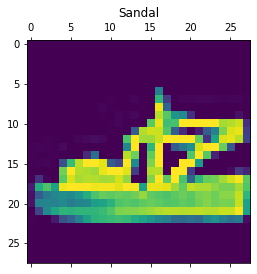

In [65]:
predict_image(y_pred,model_alexnet,542)